In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
%matplotlib inline

In [2]:
plt.rc('font', family='Malgun Gothic')

In [3]:
data = pd.read_csv('../../data/clustering_data/경기데이터.csv')

In [4]:
data

,시군,총인구수,할인율_상시,할인율_한시,구매한도_월,구매한도_연,지역화폐사용액(천원),경제활동참가율,서비스업사업체비율,제조업사업체비율,...,합계출산율,도시지역면적,주택,전체대비주택비율,면적대비주택비율,미성년비율,청년비율,중년비율,장년비율,노년비율
0,수원시,1194465,0.06,0.10,50,400,22696236.0,62.6,0.759848,0.052995,...,0.890,121182030,354566,0.086990,0.002926,0.191714,0.217396,0.260891,0.226560,0.103439
1,성남시,942724,0.06,0.00,10,50,86074070.0,62.0,0.767902,0.063562,...,0.852,141820898,251281,0.061650,0.001772,0.172351,0.198688,0.253128,0.241703,0.134130
2,의정부시,451868,0.06,0.10,40,400,9062650.0,59.4,0.758880,0.049615,...,0.847,81598380,142635,0.034994,0.001748,0.177133,0.187298,0.244418,0.248429,0.142722
3,안양시,567044,0.06,0.10,30,600,20391808.0,62.1,0.733692,0.086717,...,0.980,58480054,171744,0.042136,0.002937,0.173936,0.200810,0.241278,0.258014,0.125962
4,부천시,829996,0.06,0.10,40,400,31543254.0,63.0,0.660901,0.173820,...,0.807,53450000,255150,0.062599,0.004774,0.165990,0.204109,0.242981,0.263626,0.123295
5,광명시,316552,0.06,0.10,40,480,6372380.0,61.8,0.710427,0.092470,...,0.840,38506473,99721,0.024466,0.002590,0.186101,0.182426,0.259265,0.242419,0.129789
6,평택시,513027,0.06,0.10,30,360,10543560.0,63.8,0.722968,0.105638,...,1.102,151090527,171851,0.042162,0.001137,0.198596,0.193366,0.265432,0.224345,0.118261
7,동두천시,94768,0.06,0.10,30,360,2106819.0,56.2,0.724726,0.077040,...,0.854,33565811,33510,0.008221,0.000998,0.171149,0.161159,0.226589,0.252754,0.188349
8,안산시,650918,0.06,0.10,0,400,27036345.0,63.4,0.635912,0.173842,...,0.887,151472339,193891,0.047569,0.001280,0.176492,0.215499,0.246811,0.261677,0.099521
9,고양시,1066351,0.06,0.10,40,400,28739326.0,59.7,0.734979,0.084586,...,0.802,194127720,313254,0.076854,0.001614,0.182635,0.184406,0.253629,0.251385,0.127944


In [5]:
# 할인율_한시의 결측치를 할인율_상시로 대체
data['할인율_상시'] = data['할인율_상시'].fillna(0)
data['구매한도_월'] = data['구매한도_월'].fillna(0)
data['구매한도_연'] = data['구매한도_연'].fillna(0)
data['할인율_한시'] = np.where(pd.notnull(data['할인율_한시']) == True, data['할인율_한시'], data['할인율_상시'])

In [6]:
# 종사자 제거
data = data.drop(['제조업종사자비율','도소매업종사자비율', '운수업종사자비율','주택','전체대비주택비율'], axis=1)

In [7]:
# '성남시', '안양시', '평택시', '시흥시', '김포시', '포천시', '의왕시'
idx = data[data['시군'].isin(['성남시', '안양시', '평택시', '시흥시', '김포시', '포천시', '의왕시'])].index
data = data.drop(idx)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 30
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시군           24 non-null     object 
 1   총인구수         24 non-null     int64  
 2   할인율_상시       24 non-null     float64
 3   할인율_한시       24 non-null     float64
 4   구매한도_월       24 non-null     int64  
 5   구매한도_연       24 non-null     int64  
 6   지역화폐사용액(천원)  24 non-null     float64
 7   경제활동참가율      24 non-null     float64
 8   서비스업사업체비율    24 non-null     float64
 9   제조업사업체비율     24 non-null     float64
 10  도소매업사업체비율    24 non-null     float64
 11  운수업사업체비율     24 non-null     float64
 12  농업가구비율       24 non-null     float64
 13  합계출산율        24 non-null     float64
 14  도시지역면적       24 non-null     int64  
 15  면적대비주택비율     24 non-null     float64
 16  미성년비율        24 non-null     float64
 17  청년비율         24 non-null     float64
 18  중년비율         24 non-null     float64
 19  장년비율      

### 1) Standardization

In [9]:
x = data.drop(['시군'], axis=1)
y = data['시군'].values

In [10]:
x

,총인구수,할인율_상시,할인율_한시,구매한도_월,구매한도_연,지역화폐사용액(천원),경제활동참가율,서비스업사업체비율,제조업사업체비율,도소매업사업체비율,운수업사업체비율,농업가구비율,합계출산율,도시지역면적,면적대비주택비율,미성년비율,청년비율,중년비율,장년비율,노년비율
0,1194465,0.06,0.10,50,400,22696236.0,62.6,0.759848,0.052995,0.234011,0.105050,0.005607,0.890,121182030,0.002926,0.191714,0.217396,0.260891,0.226560,0.103439
2,451868,0.06,0.10,40,400,9062650.0,59.4,0.758880,0.049615,0.233721,0.114696,0.005818,0.847,81598380,0.001748,0.177133,0.187298,0.244418,0.248429,0.142722
4,829996,0.06,0.10,40,400,31543254.0,63.0,0.660901,0.173820,0.221111,0.093887,0.002737,0.807,53450000,0.004774,0.165990,0.204109,0.242981,0.263626,0.123295
5,316552,0.06,0.10,40,480,6372380.0,61.8,0.710427,0.092470,0.258978,0.122433,0.004860,0.840,38506473,0.002590,0.186101,0.182426,0.259265,0.242419,0.129789
7,94768,0.06,0.10,30,360,2106819.0,56.2,0.724726,0.077040,0.217266,0.107948,0.017531,0.854,33565811,0.000998,0.171149,0.161159,0.226589,0.252754,0.188349
8,650918,0.06,0.10,0,400,27036345.0,63.4,0.635912,0.173842,0.213921,0.116399,0.006213,0.887,151472339,0.001280,0.176492,0.215499,0.246811,0.261677,0.099521
9,1066351,0.06,0.10,40,400,28739326.0,59.7,0.734979,0.084586,0.266667,0.104599,0.013251,0.802,194127720,0.001614,0.182635,0.184406,0.253629,0.251385,0.127944
10,58289,0.06,0.10,40,480,6683191.0,55.3,0.802449,0.021497,0.352381,0.083537,0.017505,0.780,35853000,0.000361,0.189792,0.182328,0.233121,0.254748,0.140010
11,199265,0.06,0.10,50,600,4011320.0,60.5,0.752936,0.055844,0.290142,0.113394,0.006664,0.872,33292067,0.001733,0.179944,0.186969,0.252163,0.254689,0.126236
12,701830,0.06,0.10,50,600,12979396.0,57.8,0.674129,0.149824,0.237164,0.107284,0.017411,0.908,242423014,0.000914,0.208847,0.158515,0.269458,0.231260,0.131919


In [11]:
# x객체에 x를 표준화한 데이터를 저장
trans_x = StandardScaler().fit_transform(x.values)

In [12]:
x_df = pd.DataFrame(trans_x, columns=x.columns)

In [13]:
x_df

,총인구수,할인율_상시,할인율_한시,구매한도_월,구매한도_연,지역화폐사용액(천원),경제활동참가율,서비스업사업체비율,제조업사업체비율,도소매업사업체비율,운수업사업체비율,농업가구비율,합계출산율,도시지역면적,면적대비주택비율,미성년비율,청년비율,중년비율,장년비율,노년비율
0,2.254571,-0.208514,0.317200,0.753778,-0.807142,1.265421,0.256438,0.972636,-0.979282,0.038010,0.243857,-0.733761,-0.583316,0.094562,1.559833,0.236803,1.792607,0.442804,-0.649909,-0.915385
1,0.102447,-0.208514,0.317200,-0.150756,-0.807142,-0.303292,-0.802402,0.958287,-1.026335,0.031172,0.660280,-0.729780,-0.895223,-0.328231,0.385407,-0.347041,0.469882,-0.093576,0.162268,-0.075285
2,1.198302,-0.208514,0.317200,-0.150756,-0.807142,2.283380,0.388793,-0.493503,0.702884,-0.265765,-0.238087,-0.788043,-1.185370,-0.628885,3.402133,-0.793225,1.208705,-0.140386,0.726641,-0.490754
3,-0.289712,-0.208514,0.317200,-0.150756,0.035093,-0.612841,-0.008272,0.240339,-0.429702,0.625971,0.994305,-0.747890,-0.945999,-0.788497,1.224644,0.012042,0.255809,0.389844,-0.060926,-0.351873
4,-0.932465,-0.208514,0.317200,-1.055290,-1.228259,-1.103647,-1.861242,0.452218,-0.644517,-0.356331,0.368942,-0.508268,-0.844448,-0.841268,-0.362067,-0.586641,-0.678822,-0.674133,0.322876,0.900486
5,0.679315,-0.208514,0.317200,-3.768892,-0.807142,1.764804,0.521148,-0.863766,0.703183,-0.435100,0.733799,-0.722308,-0.605077,0.418094,-0.081189,-0.372692,1.709239,-0.015679,0.654280,-0.999167
6,1.883283,-0.208514,0.317200,-0.150756,-0.807142,1.960753,-0.703136,0.604148,-0.539462,0.807023,0.224371,-0.589202,-1.221638,0.873697,0.251438,-0.126730,0.342828,0.206332,0.272051,-0.391315
7,-1.038185,-0.208514,0.317200,-0.150756,0.035093,-0.577079,-2.159041,1.603870,-1.417811,2.825519,-0.684907,-0.508750,-1.381219,-0.816839,-0.997977,0.159835,0.251501,-0.461419,0.396943,-0.133277
8,-0.629622,-0.208514,0.317200,0.753778,1.298445,-0.884511,-0.438426,0.870211,-0.939619,1.359847,0.604089,-0.713767,-0.713882,-0.844192,0.370374,-0.234478,0.455429,0.158585,0.394743,-0.427853
9,0.826863,-0.208514,0.317200,0.753778,1.298445,0.147378,-1.331822,-0.297496,0.368801,0.112269,0.340275,-0.510528,-0.452750,1.389540,-0.445884,0.922831,-0.795015,0.721756,-0.475362,-0.306308


### 2) PCA

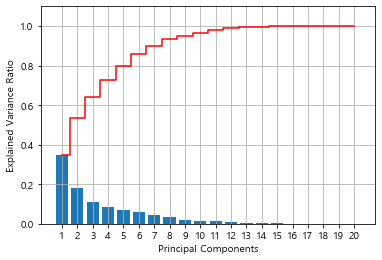

In [14]:
pca = PCA(n_components=x_df.shape[1])
pca.fit(x_df)
explained_variance_ratio = pca.explained_variance_ratio_

def explained_variance_ratio_plot(explained_variance_ratio):
    x_axis = range(1, len(explained_variance_ratio)+1)
    plt.bar(x_axis, explained_variance_ratio,
            align = 'center', label = 'Individual Explained Variance Ratio')
    plt.step(x_axis, np.cumsum(explained_variance_ratio),
             where = 'mid', color='red', label='Cumulative Explained Variance Ratio')
    plt.ylim(0, 1.1)
    plt.xticks(x_axis)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid()
    plt.show()

explained_variance_ratio_plot(explained_variance_ratio)

In [15]:
df_v = pd.DataFrame(np.cumsum(explained_variance_ratio[:10]), 
                    index=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'], 
                    columns=['Cum_V_ration'])

df_v

##주성분 9개 원래 데이터의 약 95% 설명

,Cum_V_ration
PC1,0.349344
PC2,0.532810
PC3,0.640649
PC4,0.726348
PC5,0.798552
PC6,0.857115
PC7,0.900336
PC8,0.932771
PC9,0.952219
PC10,0.967728


In [49]:
printcipalComponents = pca.fit_transform(x_df)

In [50]:
pca_data = pd.DataFrame(printcipalComponents[:,:9], 
                        columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']
                        , index = y)

In [51]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
수원시,-2.526218,-1.762598,0.811087,1.637584,-0.843334,-0.863823,1.534444,-0.442257,0.688373
의정부시,-0.145826,-2.230569,-0.052552,-0.167034,0.183500,0.167997,0.350290,-0.635191,-0.042251
부천시,-1.773776,-1.703274,3.224520,1.637042,-1.199617,-1.655289,-1.019457,-0.474593,0.365402
광명시,-0.791762,-1.632859,-0.187970,-0.732305,0.362095,-1.058371,-0.145149,-0.386562,-0.180433
동두천시,1.619412,-2.084853,-0.040410,-1.276182,0.718243,1.329982,-0.617687,-1.171241,-0.383940
안산시,-2.029362,-1.052216,3.352580,-0.435843,0.190757,1.718888,-0.682396,2.101784,-1.216699
고양시,-1.607274,-1.900445,0.379398,2.026652,-0.542372,1.002238,0.061570,0.439265,0.697319
과천시,0.980612,-3.304630,-2.761207,-0.461297,-0.014738,0.427429,-0.731662,1.173292,0.335097
구리시,-0.037637,-1.726958,-1.870650,-0.462251,-0.163270,-1.495471,-0.440665,0.223261,-0.346640
남양주시,-1.479660,0.640377,-1.903016,1.043785,-0.106606,1.020088,-0.841346,-0.802635,-0.314960


### 3) K-Means Clustering

1. elbow

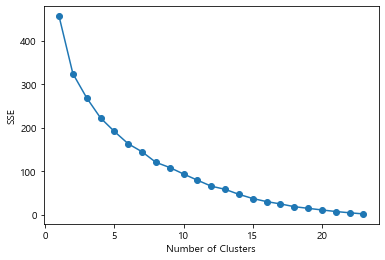

In [52]:
def elbow(x, n):
    sse = []
    for i in range(1, n):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
    plt.plot(range(1, n), sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    
elbow(pca_data, 24)

2. silhouette

Range of SC Interpretation  
0.71-1.0 A strong structure has been found  
0.51-0.70 A reasonable structure has been found  
0.26-0.50 The structure is weak and could be artificial  
< 0.25 No substantial structure has been found  

In [53]:
kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 300, "random_state": 0}

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []


# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 24):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pca_data)
    score = sklearn.metrics.silhouette_score(pca_data, kmeans.labels_)
    silhouette_coefficients.append(score)

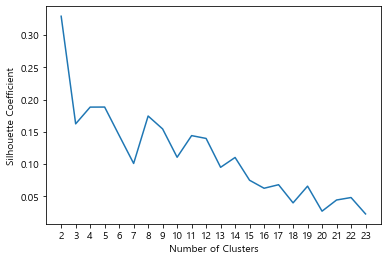

In [54]:
plt.plot(range(2, 24), silhouette_coefficients)
plt.xticks(range(2, 24))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

3. gap stastics  
https://anaconda.org/milesgranger/gap-statistic/notebook

In [55]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
            # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal   
        

In [56]:
k, gapdf = optimalK(pca_data, nrefs=5, maxClusters=15)
print ('Optimal k is: ', k)

Optimal k is:  13


C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\smk\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


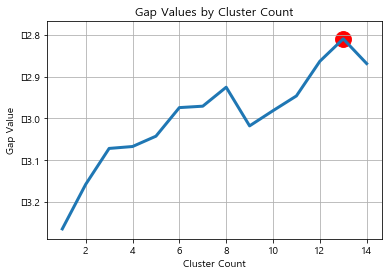

In [57]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()


4. dendrogram

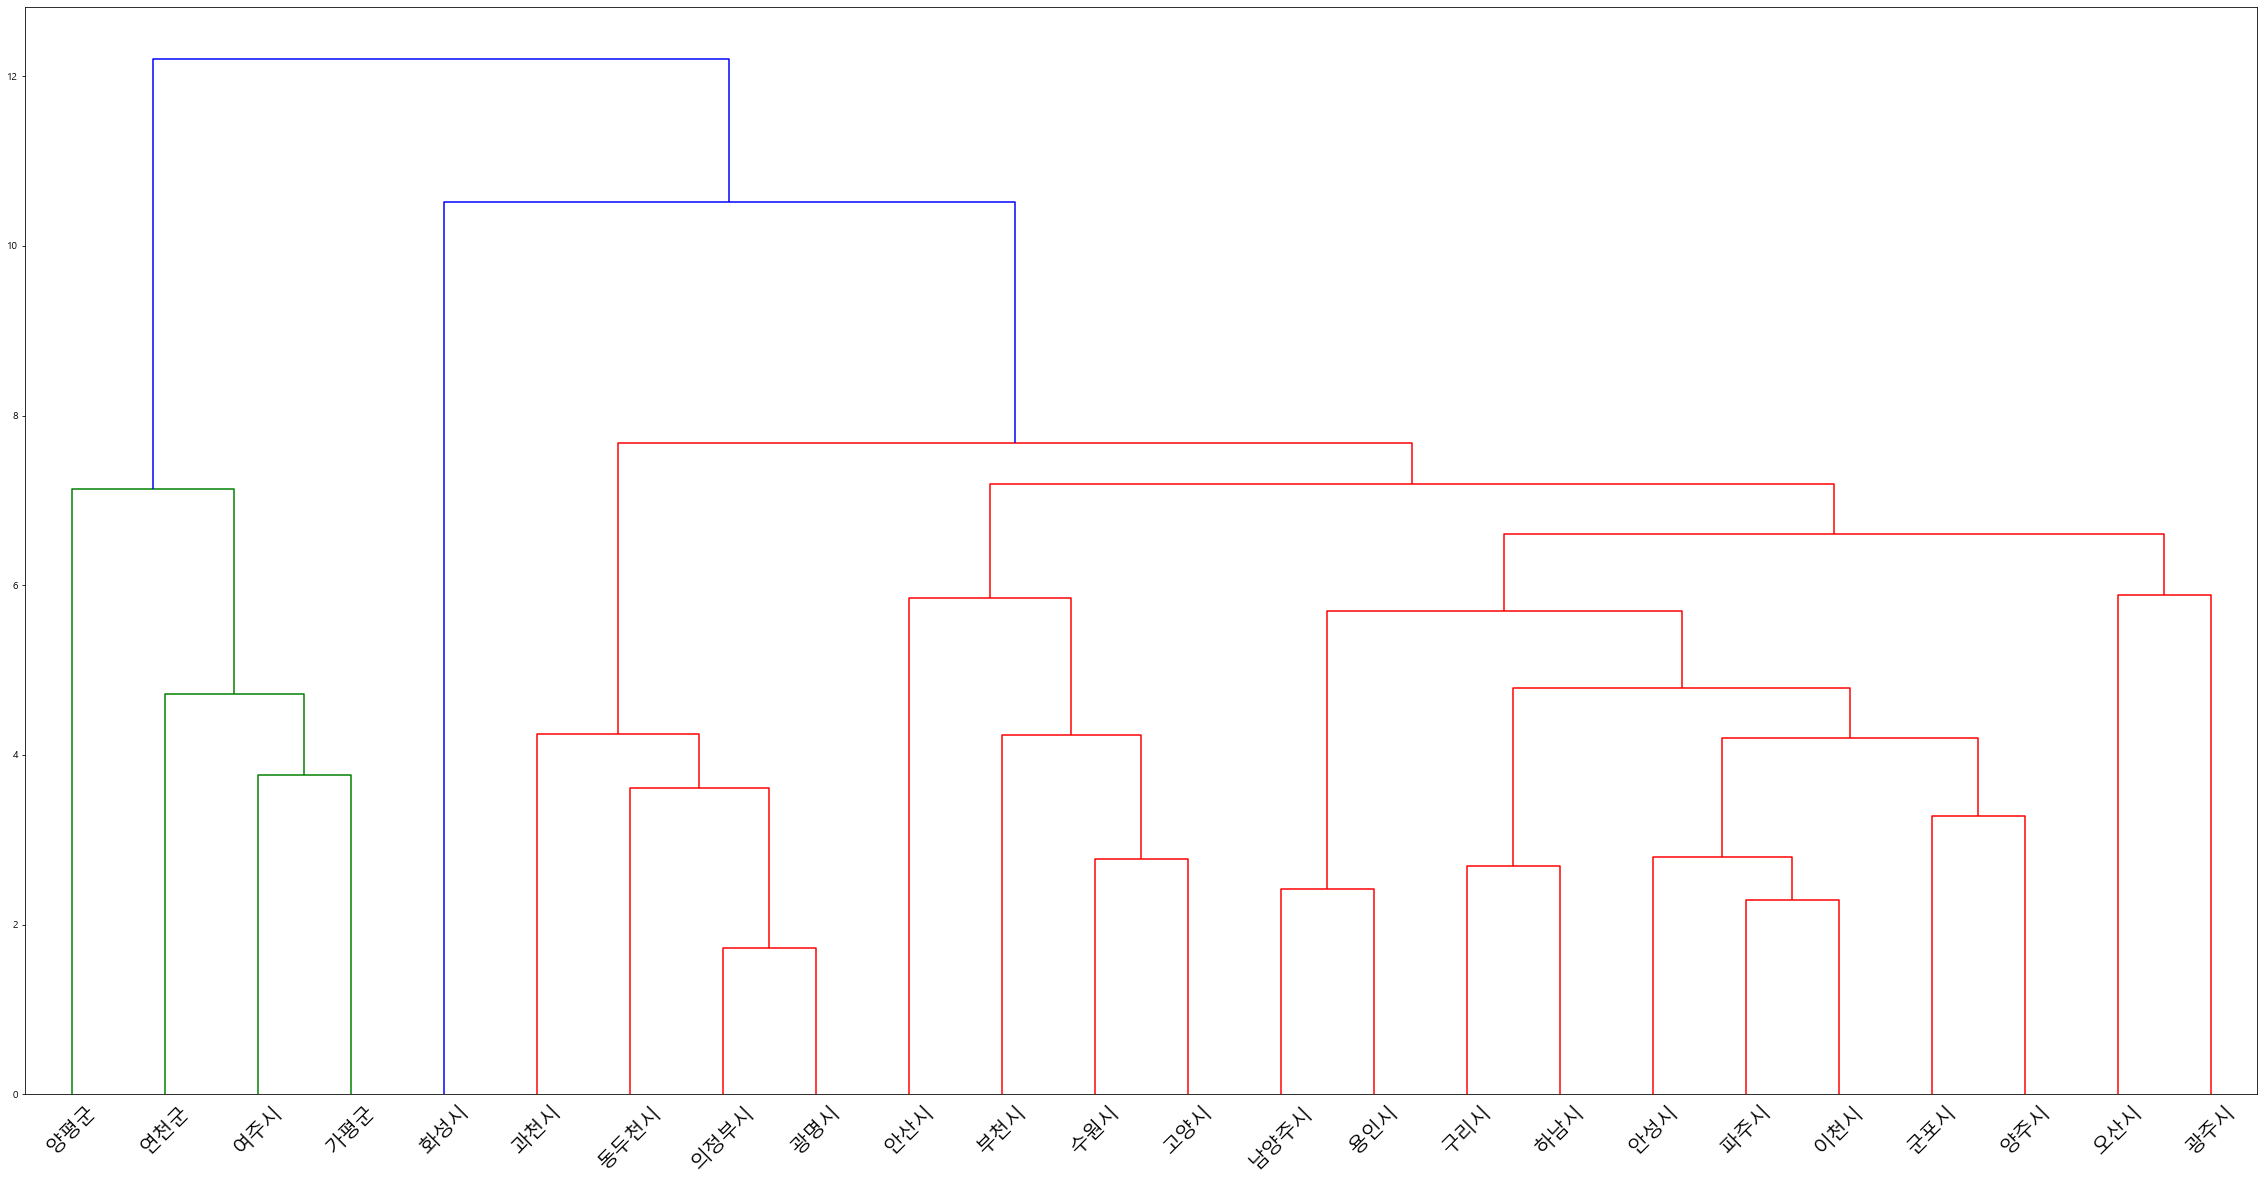

In [59]:
#link_data = pca_data.drop(['cluster_id'], axis = 1)
mergings = linkage(pca_data,method='complete')

plt.figure(figsize=(40,20))
dendrogram(mergings, labels = pca_data.index, leaf_font_size=20)
plt.show()

In [60]:
kmeans = KMeans(n_clusters=6).fit(pca_data)

In [61]:
pca_data['cluster_id'] = kmeans.labels_

In [62]:
clust_data = pca_data

In [63]:
clust_data.sort_values(by='cluster_id')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,cluster_id
수원시,-2.526218,-1.762598,0.811087,1.637584,-0.843334,-0.863823,1.534444,-0.442257,0.688373,0
부천시,-1.773776,-1.703274,3.224520,1.637042,-1.199617,-1.655289,-1.019457,-0.474593,0.365402,0
안산시,-2.029362,-1.052216,3.352580,-0.435843,0.190757,1.718888,-0.682396,2.101784,-1.216699,0
고양시,-1.607274,-1.900445,0.379398,2.026652,-0.542372,1.002238,0.061570,0.439265,0.697319,0
광주시,-0.871155,2.025052,0.869229,-0.368083,3.096202,0.360007,-1.295154,0.182146,1.626906,1
안성시,0.784678,2.127926,0.133909,-0.601745,-0.564168,-0.024250,0.297809,0.397361,0.355196,1
이천시,-0.001827,0.556926,0.405386,-1.596745,0.353178,-0.181134,1.271127,0.366560,0.298799,1
오산시,-2.603551,-0.558903,0.364431,-2.493889,1.631514,-0.433840,2.155118,-0.446301,-0.626829,1
파주시,-0.998827,0.867132,0.394396,-0.920486,0.261485,0.218946,0.032530,-1.037520,0.221901,1
양주시,-0.278469,2.295919,-0.986631,-0.502409,-0.183196,0.325448,-1.816490,-0.530316,-0.413466,2


In [64]:
data['cluster_id'] = kmeans.labels_

In [65]:
data.to_csv('../../data/clustering_data/경기클러스터.csv', index=False)

### 4) Visualization

In [66]:
data

,시군,총인구수,할인율_상시,할인율_한시,구매한도_월,구매한도_연,지역화폐사용액(천원),경제활동참가율,서비스업사업체비율,제조업사업체비율,...,농업가구비율,합계출산율,도시지역면적,면적대비주택비율,미성년비율,청년비율,중년비율,장년비율,노년비율,cluster_id
0,수원시,1194465,0.06,0.10,50,400,22696236.0,62.6,0.759848,0.052995,...,0.005607,0.890,121182030,0.002926,0.191714,0.217396,0.260891,0.226560,0.103439,0
2,의정부시,451868,0.06,0.10,40,400,9062650.0,59.4,0.758880,0.049615,...,0.005818,0.847,81598380,0.001748,0.177133,0.187298,0.244418,0.248429,0.142722,5
4,부천시,829996,0.06,0.10,40,400,31543254.0,63.0,0.660901,0.173820,...,0.002737,0.807,53450000,0.004774,0.165990,0.204109,0.242981,0.263626,0.123295,0
5,광명시,316552,0.06,0.10,40,480,6372380.0,61.8,0.710427,0.092470,...,0.004860,0.840,38506473,0.002590,0.186101,0.182426,0.259265,0.242419,0.129789,5
7,동두천시,94768,0.06,0.10,30,360,2106819.0,56.2,0.724726,0.077040,...,0.017531,0.854,33565811,0.000998,0.171149,0.161159,0.226589,0.252754,0.188349,5
8,안산시,650918,0.06,0.10,0,400,27036345.0,63.4,0.635912,0.173842,...,0.006213,0.887,151472339,0.001280,0.176492,0.215499,0.246811,0.261677,0.099521,0
9,고양시,1066351,0.06,0.10,40,400,28739326.0,59.7,0.734979,0.084586,...,0.013251,0.802,194127720,0.001614,0.182635,0.184406,0.253629,0.251385,0.127944,0
10,과천시,58289,0.06,0.10,40,480,6683191.0,55.3,0.802449,0.021497,...,0.017505,0.780,35853000,0.000361,0.189792,0.182328,0.233121,0.254748,0.140010,5
11,구리시,199265,0.06,0.10,50,600,4011320.0,60.5,0.752936,0.055844,...,0.006664,0.872,33292067,0.001733,0.179944,0.186969,0.252163,0.254689,0.126236,5
12,남양주시,701830,0.06,0.10,50,600,12979396.0,57.8,0.674129,0.149824,...,0.017411,0.908,242423014,0.000914,0.208847,0.158515,0.269458,0.231260,0.131919,2


1. cluster별 시/군

In [67]:
data_dict = {}
for i in range(6):
    dict_list = []
    for j in data.index:
        if data['cluster_id'][j] == i:
            dict_list.append(data['시군'][j])
    data_dict[i] = dict_list    

gg_cluster = pd.DataFrame.from_dict(data_dict, orient = 'index').fillna(' ')
gg_cluster

,0,1,2,3,4,5,6
0,수원시,부천시,안산시,고양시,,,
1,오산시,파주시,이천시,안성시,광주시,,
2,남양주시,용인시,화성시,양주시,,,
3,양평군,,,,,,
4,여주시,연천군,가평군,,,,
5,의정부시,광명시,동두천시,과천시,구리시,군포시,하남시


2. feature 특징

In [68]:
data_mean = data.set_index('시군').groupby('cluster_id').mean()

In [69]:
data_mean

,총인구수,할인율_상시,할인율_한시,구매한도_월,구매한도_연,지역화폐사용액(천원),경제활동참가율,서비스업사업체비율,제조업사업체비율,도소매업사업체비율,운수업사업체비율,농업가구비율,합계출산율,도시지역면적,면적대비주택비율,미성년비율,청년비율,중년비율,장년비율,노년비율
cluster_id,,,,,,,,,,,,,,,,,,,,
0,935432.500000,0.06,0.100000,32.500000,400.000000,2.750379e+07,62.175000,0.697910,0.121311,0.233927,0.104984,0.006952,0.846500,1.300580e+08,0.002648,0.179208,0.205353,0.251078,0.250812,0.113550
1,290462.400000,0.06,0.080000,40.000000,412.000000,7.113421e+06,64.080000,0.649002,0.159516,0.215146,0.115215,0.053831,1.025200,1.069496e+08,0.001083,0.200625,0.180830,0.263526,0.226208,0.128810
2,699787.250000,0.06,0.100000,50.000000,600.000000,1.493215e+07,61.275000,0.636258,0.195098,0.216530,0.097781,0.028218,1.018250,2.747405e+08,0.000766,0.217100,0.170011,0.275656,0.215046,0.122187
3,116874.000000,0.10,0.000000,50.000000,500.000000,8.659833e+06,62.600000,0.762005,0.049257,0.199381,0.067946,0.139303,1.024000,5.119887e+07,0.000781,0.147969,0.120821,0.197476,0.288979,0.244755
4,72440.666667,0.06,0.096667,40.000000,453.333333,2.459034e+06,62.666667,0.732188,0.092993,0.204989,0.059402,0.150566,1.155667,4.614259e+07,0.000727,0.145496,0.145928,0.190448,0.282650,0.235478
5,238435.571429,0.06,0.100000,42.857143,502.857143,8.488183e+06,59.857143,0.731529,0.081223,0.269375,0.107480,0.009273,0.887714,5.033152e+07,0.001520,0.183770,0.182046,0.248803,0.246576,0.138804


3. 시/군별 평균 시각화

In [70]:
data_mean.columns

Index(['총인구수', '할인율_상시', '할인율_한시', '구매한도_월', '구매한도_연', '지역화폐사용액(천원)',
       '경제활동참가율', '서비스업사업체비율', '제조업사업체비율', '도소매업사업체비율', '운수업사업체비율', '농업가구비율',
       '합계출산율', '도시지역면적', '면적대비주택비율', '미성년비율', '청년비율', '중년비율', '장년비율', '노년비율'],
      dtype='object')

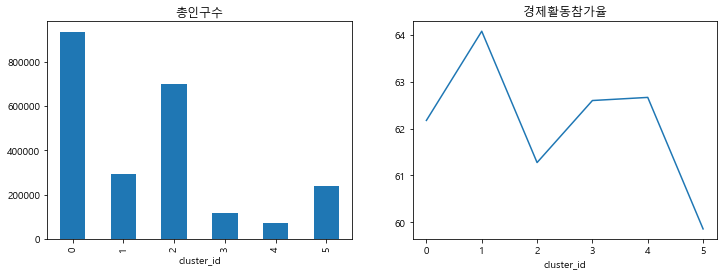

In [71]:
# 인구 ['총인구수','미성년비율','청년비율', '중년비율','장년비율','노년비율']
fig, axes = plt.subplots(1,2,figsize=(12,4))
data_mean['총인구수'].plot(kind='bar',ax = axes[0], legend = False, title = '총인구수')
data_mean['경제활동참가율'].plot(ax = axes[1], legend = False, title = '경제활동참가율')

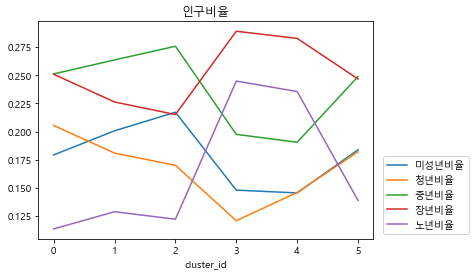

In [72]:
data_mean[['미성년비율','청년비율', '중년비율','장년비율','노년비율']].plot(title = '인구비율')
plt.legend(loc='lower right', bbox_to_anchor = (1.3, 0))

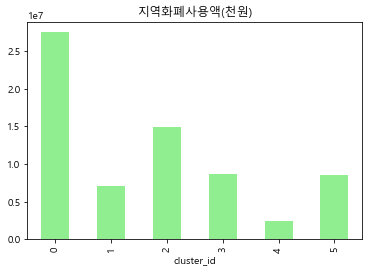

In [74]:
# 지역화폐 ['할인율_상시', '할인율_한시', '구매한도_월', '구매한도_연', '지역화폐사용액(천원)',]
data_mean['지역화폐사용액(천원)'].plot(kind='bar',legend = False, title = '지역화폐사용액(천원)', color='lightgreen')

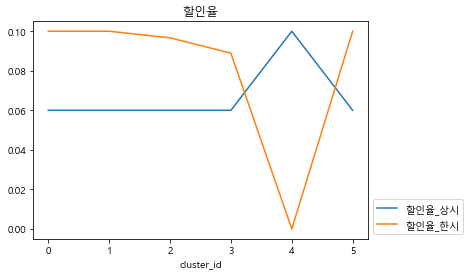

In [39]:
data_mean[['할인율_상시', '할인율_한시']].plot(title = '할인율')
plt.legend(loc='lower right', bbox_to_anchor = (1.3, 0))

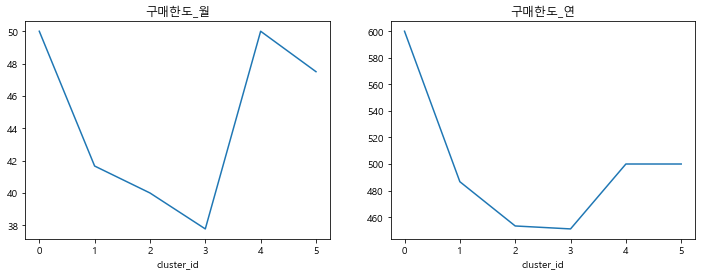

In [40]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
data_mean['구매한도_월'].plot(ax = axes[0], title = '구매한도_월')
data_mean['구매한도_연'].plot(ax = axes[1], title = '구매한도_연')

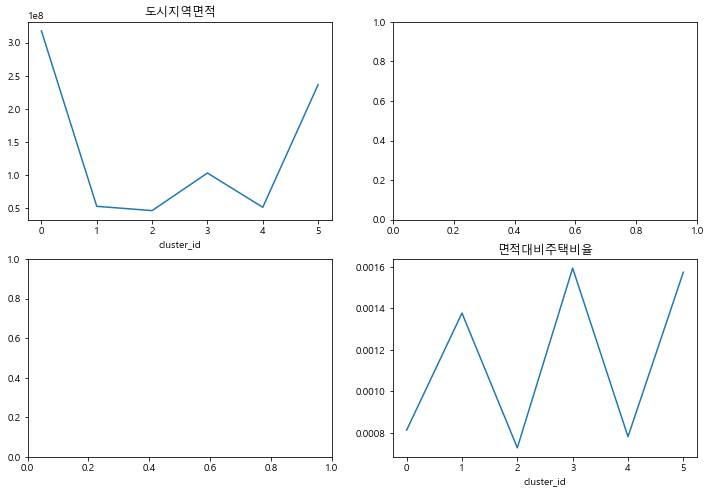

In [41]:
# 면적 및 주택 ['도시지역면적', '주택', '전체대비주택비율', '면적대비주택비율']
fig, axes = plt.subplots(2,2,figsize=(12,8))
data_mean['도시지역면적'].plot(ax = axes[0, 0], title = '도시지역면적')
data_mean['면적대비주택비율'].plot(ax = axes[1, 1], title = '면적대비주택비율')

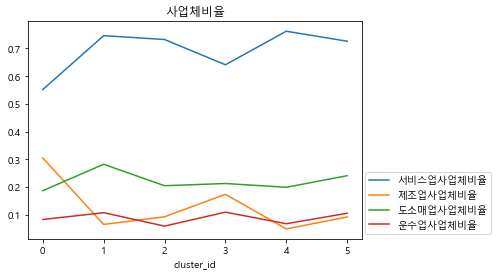

In [42]:
# 사업체비율 ['서비스업사업체비율', '제조업사업체비율', '도소매업사업체비율', '운수업사업체비율']
data_mean[['서비스업사업체비율', '제조업사업체비율', '도소매업사업체비율', '운수업사업체비율']].plot(title = '사업체비율')
plt.legend(loc='lower right', bbox_to_anchor = (1.4, 0))